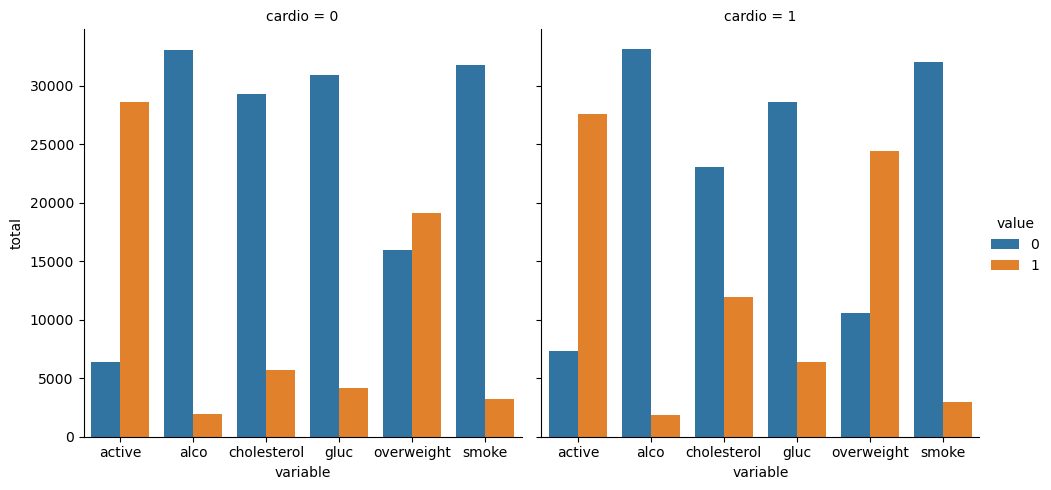

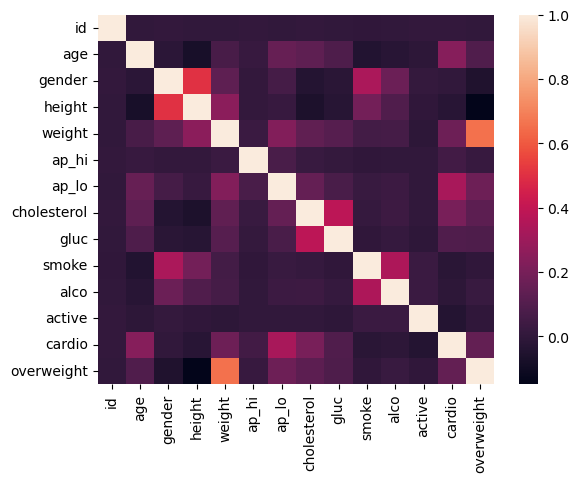

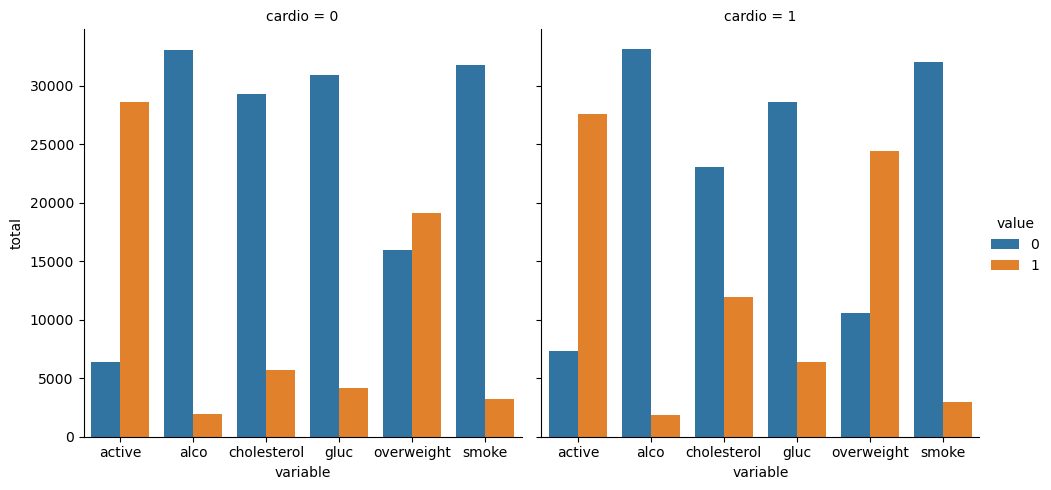

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("medical_examination.csv")

# Add 'overweight' column
BMI = (df["weight"] / (df["height"] / 100) ** 2)
df["overweight"] = BMI.apply(lambda x: 1 if x > 25 else 0)

# Normalize data
df["gluc"] = df["gluc"].apply(lambda x: 1 if x > 1 else 0)
df["cholesterol"] = df["cholesterol"].apply(lambda x: 1 if x > 1 else 0)

def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=["cardio"],
                     value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])
    
    # Group and count
    df_cat = df_cat.groupby(["cardio", "variable", "value"]).size().reset_index(name="total")
    
    # Draw the catplot
    fig = sns.catplot(x="variable", y="total", hue="value", col="cardio",
                      data=df_cat, kind="bar").fig
    
    fig.savefig("cat_plot.png")
    return fig
def draw_heat_map():
    df_heat = df[
    (df["ap_lo"] <= df["ap_hi"]) &
    (df["height"] >= df["height"].quantile(0.025)) &
    (df["height"] <= df["height"].quantile(0.975)) &
    (df["weight"] >= df["weight"].quantile(0.025)) &
    (df["weight"] <= df["weight"].quantile(0.975))]

    corr = df_heat.corr()
    fig = sns.heatmap(corr)
    
    return fig 
    fig.savefig("heat_plot.png")
    

draw_heat_map()
draw_cat_plot()


In [ ]:
Draw the Categorical Plot in the draw_cat_plot function.
Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().